In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Merging the DataFrames
1. Combine all vegetation_average.csv, temperatures.csv, and wear csv using the <b>name</b> column as the primary key
2. All recorded temperatures will need to be converted to probabilities
    - Round to the nearest hundredth
    - then divide by 100
    - if the value is greater than or equal to 1, then assign the probability of 1.0
    - ex) 80.190096 -> 0.8019 
    - ex) 101.0231 -> 1.0
3. This combined dataframe should contain the following columns: <b>name, length, wear, vegetation, and 6-1 -> 8-31 </b>for a total of 97 columns


In [2]:
temp = pd.read_csv('temperature_data.csv').rename(columns={'Unnamed: 0':'name'})
temp.iloc[:, 1:] = temp.iloc[:, 1:].round(decimals=0).div(100)
temp.iloc[:, 1:] = temp.iloc[:, 1:].mask(temp.iloc[:, 1:]>1, other = 1.0)

In [3]:
wear = pd.read_csv('wear_data.csv').iloc[:,1:]

In [4]:
veg = pd.read_csv('vegetation_average.csv').iloc[:, 1:]
veg.columns = veg.columns.str.strip()
veg = veg.transpose().reset_index()
veg.rename(columns={'index':'name', veg.columns[1]:'vegetation'}, inplace=True)

In [5]:
merged_df = wear.merge(veg, how='outer', on='name')
merged_df = merged_df.merge(temp, how='outer', on='name')
merged_df

,name,length,wear,vegetation,6-1,6-2,6-3,6-4,6-5,6-6,...,8-22,8-23,8-24,8-25,8-26,8-27,8-28,8-29,8-30,8-31
0,Humberto Perez Line,short,0.325903,0.373407,0.80,0.93,0.71,0.76,0.88,0.91,...,0.92,0.90,0.95,0.98,1.00,0.79,0.78,0.83,0.83,1.00
1,Kyle Bradford Line,short,0.076689,0.051829,0.95,0.78,0.95,0.87,0.74,0.97,...,0.97,1.00,0.92,0.77,0.85,1.00,0.79,0.95,0.86,0.91
2,Daniel Gonzalez Line,short,0.572537,0.954363,0.89,0.87,0.96,0.80,0.72,0.82,...,0.93,0.79,0.74,0.93,0.99,0.77,0.84,0.77,0.93,0.90
3,Cheryl White Line,long,0.958884,0.249980,0.95,0.89,0.73,0.72,0.71,0.91,...,0.77,0.98,0.84,0.80,0.80,0.81,1.00,0.81,0.99,0.87
4,Gordon Atkins Line,medium,0.324468,0.583971,0.71,0.77,0.81,0.71,0.93,0.77,...,0.94,0.87,0.83,0.97,0.75,0.86,1.00,0.85,0.91,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Ian Correa Line,medium,0.359471,0.796892,0.87,0.95,0.84,0.74,0.94,0.72,...,0.86,0.82,0.86,0.81,0.84,0.79,0.80,1.00,0.83,0.85
1796,Thomas Guinn Line,medium,0.444667,0.383517,0.73,0.73,0.70,0.77,0.93,0.80,...,1.00,0.92,0.97,0.82,0.75,1.00,0.74,0.83,1.00,0.83
1797,Charles Sparks Line,medium,0.748239,0.400369,0.96,0.92,0.87,0.80,0.77,0.70,...,0.99,0.85,1.00,0.77,0.75,0.83,0.87,1.00,0.98,0.92
1798,Linda Santos Line,long,0.652229,0.233560,0.77,0.74,0.85,0.90,0.84,0.77,...,0.95,0.94,0.84,0.88,0.86,0.79,1.00,0.79,0.88,0.93


# Creating FireLineRisk class (1-6)
This class should accept one argument called df that is the dataframe created above. You will refer to this dataframe as self.df throughout the class

1. Create a method called <b>calculate_risk_by_day</b>
    - it must accept vegetation, wear, weather and return the product of the 3
2. Create method called <b>create_risk_df</b>
    - it will generate a dataframe that will be stored as a class attribute called <b>risk_df</b>, it will return nothing.
    - A probability must be calculated for each day using using the formula from step 1
    - this new dataframe should have a column for <b>name, length, and  6-1 -> 8-31</b>
3. Create a method called <b>show_probability_histogram</b>
    - Using matplotlib create a histogram based on the average probabilities of each line
        - remember each line will contain 93 probabilities, it is the average of these values
    - add a parameter called <b>with_average</b> and set it equal to False by default
    - when this parameter is True draw a vertical line where the average of all averages is located
    - Even if with_average is False, generate the average value is it will be stored in your title
    - add this title "Fire Probability by Frequency (Average of {<b>the average you have calculated</b>})"
    - the label of y the axis "Frequency"
    - the label of the x axis "Fire Probability"
4. Create a method called <b>plot_by_length</b>, a plot with three lines, that will contain a list of average probabilities based on <b>length</b> ( short/medium/long )
    - sort the data from least to greatest and plot
    - all lines should be in a different color
    - include a legend that will distinguish which lines belong to what length ( short/medium/long )
    - title: "Probabilities By Line", x axis title: "Lines", y axis title: "Fire Probability"
5. There is a probability threshold of 0.35, when probabilities are greater than this value, the company is forced to shut off power to avoid any fires. This costs <b>150 dollars</b> on a per line basis
    - create a method called <b>total_cost</b> that takes a parameter <b>threshold</b> that is set to 0.35 by default
    - return the total cost for all lines and days
6. Determine the total cost by month and create a bar chart
    - create a method called <b>total_cost_by_month</b> that shows a bar chart for each month and returns dictionary where month ("june", "july", and "august") are the keys and the values are the sum
    - add labels to the chart that best describe each axis and title
    - make sure each are a different color

In [6]:
class FireLineRisk:
    
    def __init__(self, df):
        self.df = df
        
    def calculate_risk_by_day(self, df):
        cal_df = df.copy()
        cal_df.iloc[:,4:] = cal_df.iloc[:,4:].multiply(df.loc[:, 'wear'], axis="index")
        cal_df.iloc[:,4:] = cal_df.iloc[:,4:].multiply(df.loc[:, 'vegetation'], axis="index")
        return cal_df
    
    def create_risk_df(self):
        self.risk_df = self.calculate_risk_by_day(self.df)
        self.risk_df = self.risk_df.drop(columns=['wear', 'vegetation'])
        return
    
    def show_probability_histogram(self, with_average = False):
        df = self.risk_df.copy()
        df['avg'] = df.iloc[:, 2:].mean(axis=1)
        plt.figure(figsize=(16, 9))
        plt.hist(df['avg'])
        avg = df['avg'].mean()
        if with_average == True:
            plt.axvline(x=avg, color='gold') 
        plt.xlabel('Fire Probability')
        plt.ylabel('Frequency')
        plt.title("Fire Probability vs. Frequency (Average of %1.2f)" %avg)
        return
    
    def plot_by_length(self):
        df = self.risk_df.copy()
        df['avg'] = df.iloc[:, 2:].mean(axis=1)
        short = df.loc[df['length']=='short', 
                       ['name', 'length', 'avg']].sort_values(by='avg').reset_index()
        medium = df.loc[df['length']=='medium', 
                        ['name', 'length', 'avg']].sort_values(by='avg').reset_index()
        long = df.loc[df['length']=='long', 
                      ['name', 'length', 'avg']].sort_values(by='avg').reset_index()
        plt.figure(figsize=(16, 9))
        plt.plot(short.index,short['avg'], label='Short Length')
        plt.plot(medium.index,medium['avg'], label='Medium Length')
        plt.plot(long.index,long['avg'], label='Long Length')
        plt.legend()
        plt.xlabel('Lines')
        plt.ylabel('Fire Probability')
        plt.title('Probabilities By Line')
        return
    
    def total_cost(self, threshold=0.35):
        sum_df = self.risk_df.copy()
        sum_df.iloc[:, 2:] = sum_df.iloc[:, 2:].mask(sum_df.iloc[:, 2:]>=threshold, 1500)
        sum_df.iloc[:, 2:] = sum_df.iloc[:, 2:].mask(sum_df.iloc[:, 2:]<threshold, 0)
        return sum_df, int(sum_df.iloc[:, 2:].sum().sum())
    
    def total_cost_by_month(self):
        sum_df, total = self.total_cost()
        june = sum_df.iloc[:, 2:33]
        july = sum_df.iloc[:, 33:64]
        august = sum_df.iloc[:, 64:]
        plt.figure(figsize=(16, 9))
        plt.bar(x = ['June', 'July', 'August'], 
                height = [june.sum().sum(), july.sum().sum(), august.sum().sum()],
               color = ['blue', 'gold', 'magenta'])
        plt.xlabel('Month')
        plt.ylabel('Cost')
        plt.title('Total Cost By Month')
        return int(june.sum().sum()), int(july.sum().sum()), int(august.sum().sum())
        

In [7]:
obj = FireLineRisk(merged_df)
obj.create_risk_df()

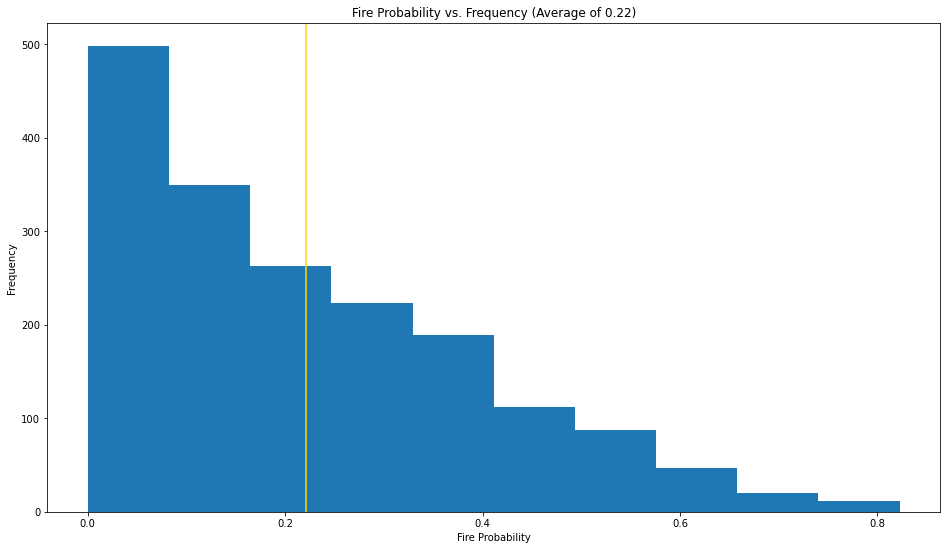

In [8]:
obj.show_probability_histogram(True)

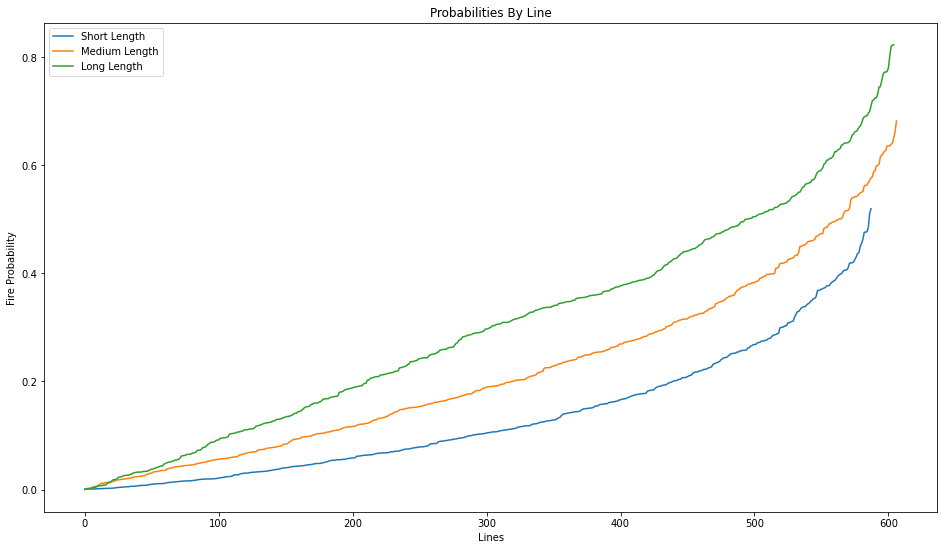

In [9]:
obj.plot_by_length()

june: 17377500
july: 20148000
aug: 19489500
The total cost is 57015000
True


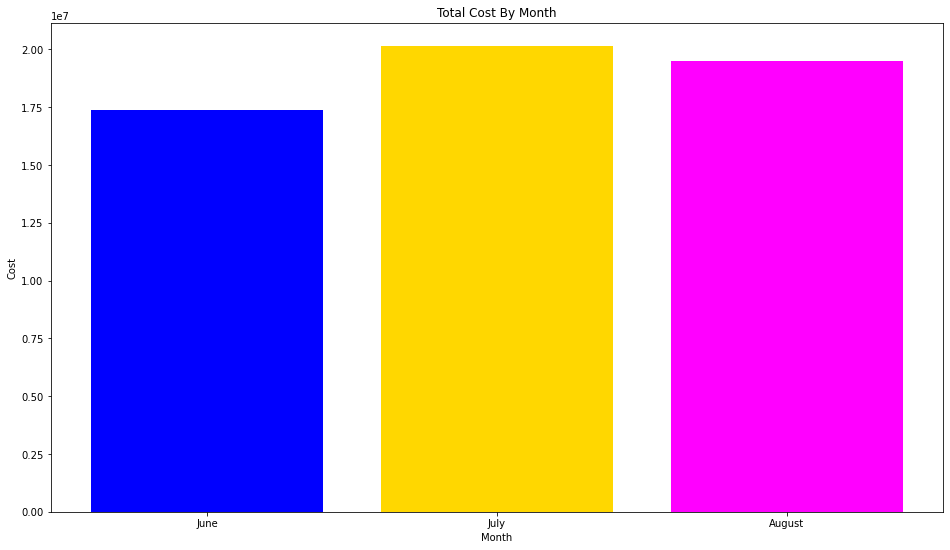

In [10]:
sum_df, total = obj.total_cost()
june, july, aug = obj.total_cost_by_month()
print('june: ' + str(june))
print('july: ' + str(july))
print('aug: ' + str(aug))
print('The total cost is ' + str(june+july+aug))
print(june+july+aug == total)

--- 
# 7. Performing fixed-cost mitigation

Vegetation Management plays a huge role in mitigating fires. Trees that collapse on powerlines may ignite massive fires and cause catastrophic damages.
    - Performing this mitigation action reduces the **vegetation probability in half** at a large cost of **50,000 dollars per line**
    - Determine which lines need vegetation management to save the most money

## Helper function:

In [11]:
def veg_manage(m_threshold, df):
    df = df.copy()
    old = FireLineRisk(df)
    old.create_risk_df()
    before_sum_df, before_cost = old.total_cost()
    before_sum_df['sum'] = before_sum_df.iloc[:, 2:].sum(axis=1)
    to_be_mitigated = before_sum_df.loc[before_sum_df['sum'] > m_threshold]['name']
    df.loc[df['name'].isin(to_be_mitigated), 'vegetation'] = df.loc[df['name'].isin(to_be_mitigated), 'vegetation']*0.5
    new = FireLineRisk(df)
    new.create_risk_df()
    after_sum_df, after_cost = new.total_cost()
    return after_cost+len(to_be_mitigated)*50000


## Reasoning:
We can choose the cost $C$, which is "m_threshold" in the function above, as the variable to be optimized. If the cost of one line is greater than $C$, then we perform a 50000-dollar mitigation and compare the "before_cost" and "after_cost". Our goal is to optimize this variable $C$ to make after_cost as small as possible. 

The maximal cost of one line in 93 days is: $1500*93=139500$. Thus, we set the upper limit to be 13950, i.e., over this limit, no mitigation will be performed and no difference between the before_cost and after_cost. Also, the step_size has a smallest unit of 1500 because the shut-down cost increases by this amount on a day when when shutdown happens. 

## Optimization (brute force):

In [12]:
step_size = 1500
iteration = int((139500+step_size*5)/step_size)
x = np.arange(0, iteration).astype(int)
y = np.empty([iteration,]).astype(int)
for i in x: 
    y[i] = veg_manage(i*step_size, merged_df)
x = x*step_size

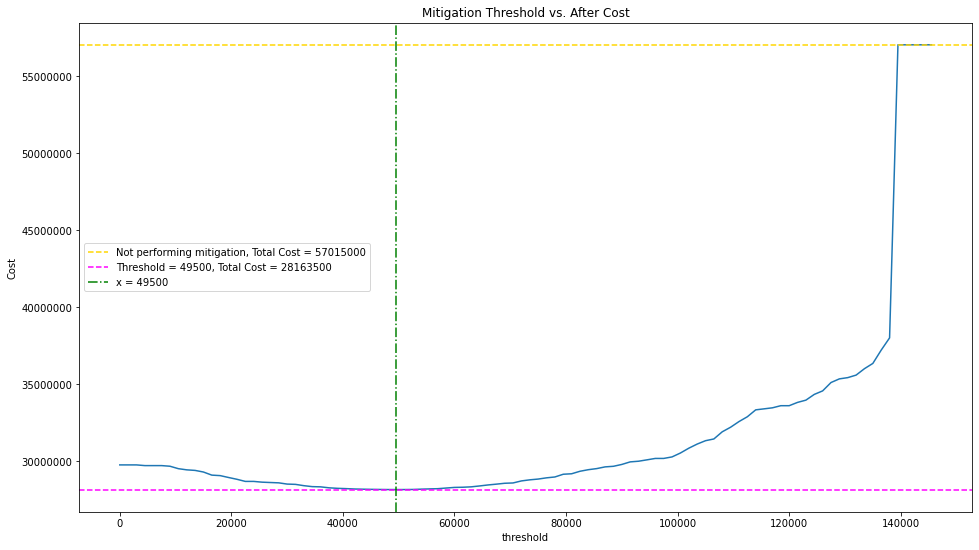

In [13]:
plt.figure(figsize=(16, 9))
plt.plot(x.astype(int), y.astype(int))
plt.axhline(57015000, color='gold',linestyle="--", label='Not performing mitigation, Total Cost = 57015000')
plt.axhline(y.min(), color='magenta', linestyle="--", 
            label= 'Threshold = %d, ' %x[np.where(y==y.min())[0][0]] + 'Total Cost = %d' %y.min())
plt.axvline(x[np.where(y==y.min())[0][0]], color='green', linestyle='-.', 
            label='x = %d' %x[np.where(y==y.min())[0][0]])
plt.legend(loc='center left')
plt.ticklabel_format(style='plain')
plt.xlabel('threshold')
plt.ylabel('Cost')
plt.title('Mitigation Threshold vs. After Cost')
plt.show()

--- 
# 8. Mitigation combinations


The company has set the threshold to 0.2, but now vegetation management cost will vary based on length. The users have the ability to choose mitigation of the current lines <b>size or smaller</b>. Meaning if I have a large line I can decide to manage a smaller portion of the line for a smaller fee and for a smaller impact on the vegetation probability

- small = 15,000 dollars, mitigation impact (small = 0.5, medium = 0.35, large=0.2)
- medium = 30,000 dollars, mitigation impact (medium = 0.5, large=0.25)
- large = 50,000 dollars, mitigation impact (large = 0.5)
    
ex) large line, vegetation probability of 0.8
- at large vegetation management for 50,000 dollars we reduce the probability of vegetation to 0.4 ((1-0.5) * 0.8)
- at medium vegetation management for 30,000 dollars we reduce the probability of vegetation to 0.52 ((1-0.35) * 0.8)
- at small vegetation management for 15,000 dollars we reduce the probability of vegetation to 0.64 ((1-0.2) * 0.8)
        
- using all of this information, determine the overall cost before vegetation management where the threshold is 0.2
- determine the lowest cost based on optimal use of the vegetation management system
- create a dictionary for each line with the following keys and them to list, then create a dataframe with this information
   - original cost
   - reduced cost
   - length
   - mitigation size
- Fill original cost and reduced cost with the same value if they are identical and set mitigation size to null if no mitigation was performed <b>Mitigation = Vegetation Management</b>


### Reasoning:

In this problem, since the pipes in three different length has different and independent mitigation solutions, we find the optimal solution of them seperately. For each length, the process is similar to problem 7, except that there are two and three thresholds for medium and long pipes, respectively.   

### Globally:

In [14]:
df = merged_df.copy()
old = FireLineRisk(df)
old.create_risk_df()
before_sum_df, before_cost = old.total_cost(0.2)
before_sum_df['sum'] = before_sum_df.iloc[:, 2:].sum(axis=1)

before_short = before_sum_df.loc[before_sum_df['length']=='short', ['name', 'sum']]
before_medium = before_sum_df.loc[before_sum_df['length']=='medium', ['name', 'sum']]
before_long = before_sum_df.loc[before_sum_df['length']=='long', ['name', 'sum']]

short_df = df.loc[df['length']=='short']
medium_df = df.loc[df['length']=='medium']
long_df = df.loc[df['length']=='long']

print('Before cost of all lines: ' + str(before_cost))

Before cost of all lines: 115210500


In [15]:
short = short_df.copy()
medium = medium_df.copy()
long = long_df.copy()

s = FireLineRisk(short)
s.create_risk_df()
s_sum, s_cost = s.total_cost(0.2)

m = FireLineRisk(medium)
m.create_risk_df()
m_sum, m_cost = m.total_cost(0.2)

l = FireLineRisk(long)
l.create_risk_df()
l_sum, l_cost = l.total_cost(0.2)

s_cost + m_cost + l_cost == before_cost

True

### Helper functions:

In [16]:
def short_manage(var):
    df = short_df.copy()
    old = FireLineRisk(df)
    old.create_risk_df()
    mitigation_cost=0
    
    short_small = before_short.loc[before_short['sum'] > var]['name']
    df.loc[df['name'].isin(short_small), 'vegetation'] = df.loc[df['name'].isin(short_small), 'vegetation']*0.5
    mitigation_cost += len(short_small)*15000
    
    new = FireLineRisk(df)
    new.create_risk_df()
    after_sum_df, after_cost = new.total_cost(0.2)
    
    return after_cost + mitigation_cost, after_sum_df



def medium_manage(var_1, var_2):
    df = medium_df.copy()
    old = FireLineRisk(df)
    old.create_risk_df()
    mitigation_cost=0
    
    medium_small = before_medium.loc[(before_medium['sum']>var_1) & (before_medium['sum']<var_2)]['name']
    df.loc[df['name'].isin(medium_small), 'vegetation'] = df.loc[df['name'].isin(medium_small), 'vegetation']*0.65
    mitigation_cost += len(medium_small)*15000
    medium_medium = before_medium.loc[before_medium['sum']>=var_2]['name']
    df.loc[df['name'].isin(medium_medium), 'vegetation'] = df.loc[df['name'].isin(medium_medium), 'vegetation']*0.5
    mitigation_cost += len(medium_medium)*30000
    
    new = FireLineRisk(df)
    new.create_risk_df()
    after_sum_df, after_cost = new.total_cost(0.2)
    
    return after_cost + mitigation_cost, after_sum_df
    
    
    
def long_manage(var_1, var_2, var_3):
    df = long_df.copy()
    old = FireLineRisk(df)
    old.create_risk_df()
    mitigation_cost=0
    
    long_small = before_long.loc[(before_long['sum']>var_1) & (before_long['sum']<var_2)]['name']
    df.loc[df['name'].isin(long_small), 'vegetation'] = df.loc[df['name'].isin(long_small), 'vegetation']*0.8
    mitigation_cost += len(long_small)*15000
    long_medium = before_long.loc[(before_long['sum']>=var_2) & (before_long['sum']<var_3)]['name']
    df.loc[df['name'].isin(long_medium), 'vegetation'] = df.loc[df['name'].isin(long_medium), 'vegetation']*0.75
    mitigation_cost += len(long_medium)*30000
    long_large = before_long.loc[before_long['sum']>=var_3]['name']
    df.loc[df['name'].isin(long_large), 'vegetation'] = df.loc[df['name'].isin(long_large), 'vegetation']*0.5
    mitigation_cost += len(long_large)*50000
    
    new = FireLineRisk(df)
    new.create_risk_df()
    after_sum_df, after_cost = new.total_cost(0.2)
    
    return after_cost + mitigation_cost, after_sum_df

### Optimization For Short:

In [17]:
step_size = 1500
iteration = int((139500+step_size*5)/step_size)
x = np.arange(0, iteration).astype(int)
y = np.empty([iteration,]).astype(int)
for i in x: 
    y[i], after_short = short_manage(i*step_size)
x = x*step_size

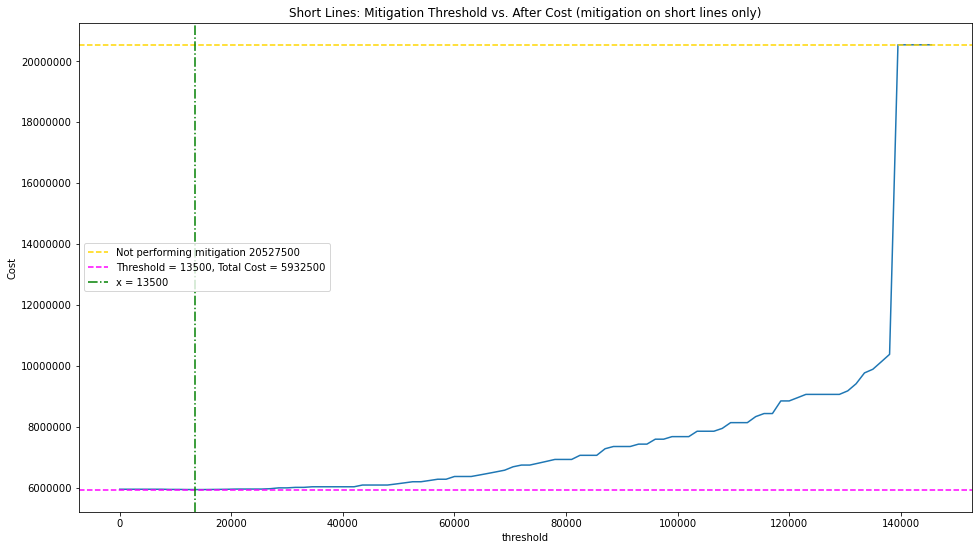

In [18]:
plt.figure(figsize=(16, 9))
plt.plot(x.astype(int), y.astype(int))
plt.axhline(before_short['sum'].sum(), color='gold',linestyle="--", 
            label='Not performing mitigation %d' %before_short['sum'].sum())
plt.axhline(y.min(), color='magenta', linestyle="--", 
            label= 'Threshold = %d, ' %x[np.where(y==y.min())[0][0]] + 'Total Cost = %d' %y.min())
plt.axvline(x[np.where(y==y.min())[0][0]], color='green', linestyle='-.', 
            label='x = %d' %x[np.where(y==y.min())[0][0]])
plt.legend(loc='center left')
plt.ticklabel_format(style='plain')
plt.xlabel('threshold')
plt.ylabel('Cost')
plt.title('Short Lines: Mitigation Threshold vs. After Cost (mitigation on short lines only)')
plt.show()

In [19]:
s_min = np.where(y==y.min())
short_threshold = x[s_min[0][0]]
short_min = y.min()
print('Threshold = ' + str(short_threshold))

print('Minimal cost of short: ' + str(short_min))
print('Before cost of short: ' + str(s_cost))
print('                      ========')
print('Difference:          ' + str(short_min-s_cost))

Threshold = 13500
Minimal cost of short: 5932500
Before cost of short: 20527500
Difference:          -14595000



### Optimization For Medium: 

Because we are using brute force with a time complexity of $O(N^3)$, using step size of 1500 is time consuming. So, we scale it appropriately. However, doing so might affact the accuracy of the optimal solution because of the decrease in resolution. But the error is acceptable.

In [20]:
step_size = 1500*5
iteration = int((139500+step_size*5)/step_size)

x_1 = np.arange(0, iteration).astype(int)
x_2 = np.arange(0, iteration).astype(int)
y_2d = np.empty([iteration,iteration]).astype(int)

for i in x_1:
    for j in x_2:
        if i>j:
            y_2d[i, j] = l_cost
        else:
            y_2d[i, j], after_medium = medium_manage(i*step_size, j*step_size)

                    
x_1 = x_1*step_size
x_2 = x_2*step_size

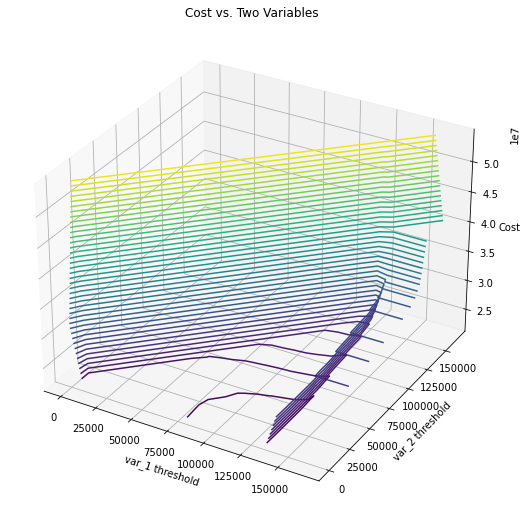

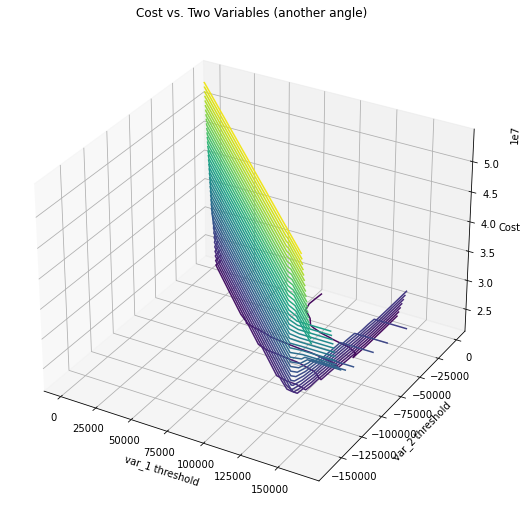

In [21]:
plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.contour3D(x_2, x_1, y_2d, 50)
ax.set_zlabel('Cost')
ax.set_xlabel('var_1 threshold')
ax.set_ylabel('var_2 threshold');
ax.set_title('Cost vs. Two Variables')
plt.show()
plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.contour3D(x_2, -x_1, y_2d, 50)
ax.set_zlabel('Cost')
ax.set_xlabel('var_1 threshold')
ax.set_ylabel('var_2 threshold')
ax.set_title('Cost vs. Two Variables (another angle)')
plt.show()

**The sharp cut edge is because of the loop being used. Because var_1 is always smaller than var_2, it is not necessary to loop through and call the function when var_1 > var_2.**

In [22]:
medium_min = y_2d.min()
np.partition(y_2d, 4)[4]
m_min = np.where(y_2d==y_2d.min())
medium_v1 = x_1[m_min[0][0]]
medium_v2 = x_2[m_min[1][0]]


print('Threshold 1 = ' + str(medium_v1))
print('Threshold 2 = ' + str(medium_v2) + '\n')

print('Minimal cost of medium: ' + str(medium_min))
print('Before cost of medium:  ' + str(m_cost))
print('                        ========')
print('Difference:            ' + str(medium_min-m_cost))

Threshold 1 = 15000
Threshold 2 = 135000

Minimal cost of medium: 21849000
Before cost of medium:  40054500
Difference:            -18205500


### Optimization for Long

Similar to the medium, but without visulization because there are 3 dimensions.

In [23]:
step_size = 1500*10
iteration = int((139500+step_size*5)/step_size)
            
x_i = np.arange(0, iteration).astype(int)
x_j = np.arange(0, iteration).astype(int)
x_k = np.arange(0, iteration).astype(int)
y_3d = np.empty([iteration,iteration, iteration]).astype(int)

for i in x_i:
    for j in x_j:
        for k in x_k:
            if i>j or i>k or j>k:
                y_3d[i, j, k] = l_cost
            else:
                y_3d[i, j, k], after_long= long_manage(i*step_size, j*step_size, k*step_size)

x_i = x_i*step_size
x_j = x_j*step_size
x_k = x_k*step_size

In [24]:
l_min = np.where(y_3d==y_3d.min())
long_v1 = x_i[l_min[0][0]]
long_v2 = x_j[l_min[1][0]]
long_v3 = x_k[l_min[2][0]]
long_min = y_3d.min()

print('Threshold 1 = ' + str(long_v1))
print('Threshold 2 = ' + str(long_v2))
print('Threshold 3 = ' + str(long_v3) + '\n')

print('Minimal cost of long: ' + str(long_min))
print('Before cost of long:  ' + str(l_cost))
print('                      ========')
print('Difference:          ' + str(long_min-l_cost))

Threshold 1 = 0
Threshold 2 = 120000
Threshold 3 = 135000

Minimal cost of long: 44783000
Before cost of long:  54628500
Difference:          -9845500


### Therefore, the total minimal cost and the money saved:

In [25]:
print('Total minimal cost: ' + str(long_min + medium_min + short_min))
print('Total before cost: ' + str(before_cost))
print('                    ========')
print('Difference:        ' + str(long_min + medium_min + short_min - before_cost))

Total minimal cost: 72564500
Total before cost: 115210500
Difference:        -42646000


### Generating the information for each line:

In [26]:
y_short, after_short = short_manage(short_threshold)
after_short['sum'] = after_short.iloc[:, 2:].sum(axis=1)

y_medium, after_medium = medium_manage(medium_v1, medium_v2)
after_medium['sum'] = after_medium.iloc[:, 2:].sum(axis=1)

y_long, after_long = long_manage(long_v1, long_v2, long_v3)
after_long['sum'] = after_long.iloc[:, 2:].sum(axis=1)

In [27]:
info_list = []
df = merged_df.copy()

for item in df['name']:
    if item in before_short['name'].tolist():
        cond = before_short.loc[before_short['name']==item, 'sum'].values[0]
        if cond <= short_threshold:
            original_cost = cond
            reduced_cost = after_short.loc[before_short['name']==item, 'sum'].values[0]
            length = 'short'
            mitigation_size = '' 
            info_list.append({'name' : item,
                      'original cost': original_cost,
                      'reduced cost' : reduced_cost,
                      'length' : length,
                      'mitigation size' : mitigation_size})
        elif cond > short_threshold:
            original_cost = cond
            reduced_cost = after_short.loc[before_short['name']==item, 'sum'].values[0]
            length = 'short'
            mitigation_size = 'small' 
            info_list.append({'name' : item,
                      'original cost': original_cost,
                      'reduced cost' : reduced_cost,
                      'length' : length,
                      'mitigation size' : mitigation_size})
            
    elif item in before_medium['name'].tolist():
        cond = before_medium.loc[before_medium['name']==item, 'sum'].values[0]
        if cond <= medium_v1:
            original_cost = cond
            reduced_cost = after_medium.loc[before_medium['name']==item, 'sum'].values[0]
            length = 'medium'
            mitigation_size = '' 
            info_list.append({'name' : item,
                      'original cost': original_cost,
                      'reduced cost' : reduced_cost,
                      'length' : length,
                      'mitigation size' : mitigation_size})           
        elif cond > medium_v1 and cond <= medium_v2:
            original_cost = cond
            reduced_cost = after_medium.loc[before_medium['name']==item, 'sum'].values[0]
            length = 'medium'
            mitigation_size = 'small' 
            info_list.append({'name' : item,
                      'original cost': original_cost,
                      'reduced cost' : reduced_cost,
                      'length' : length,
                      'mitigation size' : mitigation_size})            
        elif cond > medium_v2:
            original_cost = cond
            reduced_cost = after_medium.loc[before_medium['name']==item, 'sum'].values[0]
            length = 'medium'
            mitigation_size = 'medium' 
            info_list.append({'name' : item,
                      'original cost': original_cost,
                      'reduced cost' : reduced_cost,
                      'length' : length,
                      'mitigation size' : mitigation_size})  
            
    elif item in before_long['name'].tolist():
        cond = before_long.loc[before_long['name']==item, 'sum'].values[0]
        if cond <= long_v1:
            original_cost = cond
            reduced_cost = after_long.loc[before_long['name']==item, 'sum'].values[0]
            length = 'long'
            mitigation_size = '' 
            info_list.append({'name' : item,
                      'original cost': original_cost,
                      'reduced cost' : reduced_cost,
                      'length' : length,
                      'mitigation size' : mitigation_size})
        elif cond > long_v1 and cond <= long_v2:
            original_cost = cond
            reduced_cost = after_long.loc[before_long['name']==item, 'sum'].values[0]
            length = 'long'
            mitigation_size = 'small' 
            info_list.append({'name' : item,
                      'original cost': original_cost,
                      'reduced cost' : reduced_cost,
                      'length' : length,
                      'mitigation size' : mitigation_size})            
        elif cond > long_v2 and cond <= long_v3:
            original_cost = cond
            reduced_cost = after_long.loc[before_long['name']==item, 'sum'].values[0]
            length = 'long'
            mitigation_size = 'medium' 
            info_list.append({'name' : item,
                      'original cost': original_cost,
                      'reduced cost' : reduced_cost,
                      'length' : length,
                      'mitigation size' : mitigation_size})            
        elif cond > long_v3:
            original_cost = cond
            reduced_cost = after_long.loc[before_long['name']==item, 'sum'].values[0]
            length = 'long'
            mitigation_size = 'large' 
            info_list.append({'name' : item,
                      'original cost': original_cost,
                      'reduced cost' : reduced_cost,
                      'length' : length,
                      'mitigation size' : mitigation_size})    

In [28]:
# Some examples:
print(info_list[0])
print(info_list[2])
print(info_list[168])
print(info_list[1787])
print(info_list[1795])
print(info_list[1799])

{'name': 'Humberto Perez Line', 'original cost': 0.0, 'reduced cost': 0.0, 'length': 'short', 'mitigation size': ''}
{'name': 'Daniel Gonzalez Line', 'original cost': 139500.0, 'reduced cost': 132000.0, 'length': 'short', 'mitigation size': 'small'}
{'name': 'Alan Brock Line', 'original cost': 139500.0, 'reduced cost': 0.0, 'length': 'short', 'mitigation size': 'small'}
{'name': 'Melanie Allen Line', 'original cost': 139500.0, 'reduced cost': 139500.0, 'length': 'long', 'mitigation size': 'large'}
{'name': 'Ian Correa Line', 'original cost': 139500.0, 'reduced cost': 0.0, 'length': 'medium', 'mitigation size': 'medium'}
{'name': 'Timothy Diehl Line', 'original cost': 0.0, 'reduced cost': 0.0, 'length': 'medium', 'mitigation size': ''}


In [29]:
converted_df = pd.DataFrame(info_list)
converted_df

,name,original cost,reduced cost,length,mitigation size
0,Humberto Perez Line,0.0,0.0,short,
1,Kyle Bradford Line,0.0,0.0,short,
2,Daniel Gonzalez Line,139500.0,132000.0,short,small
3,Cheryl White Line,79500.0,0.0,long,small
4,Gordon Atkins Line,0.0,0.0,medium,
...,...,...,...,...,...
1795,Ian Correa Line,139500.0,0.0,medium,medium
1796,Thomas Guinn Line,0.0,0.0,medium,
1797,Charles Sparks Line,139500.0,0.0,medium,medium
1798,Linda Santos Line,0.0,0.0,long,
